# Decoding Data Science: A Salary Analysis for 2023

In this project, we aim to analyze the salaries of data science professionals in the year 2023. 
The dataset contains the following columns:

- work_year: The year of work
- experience_level: The level of experience (EN:Entry, MI:Middle, SE:Senior, EX:Executive.)
- employment_type: Type of employment (FT:Full Time, CT:Contract, FL:Freelance, PT:Part Time)
- job_title: The title of the job
- salary: Salary in the original currency
- salary_currency: The original currency of the salary
- salary_in_usd: Salary converted to USD
- employee_residence: The residence of the employee
- remote_ratio: The percentage of remote work
- company_location: The location of the company
- company_size: The size of the company 

We hypothesize that the salary varies significantly depending on the level of experience, the employment type, and the location of the company. Higher salaries will be paid in countries with a generally higher base salary but also a more developed data science and tech sector. 

# Data Loading and Initial Exploration

We'll start by loading our dataset and doing a quick initial exploration to see the first few rows and understand the structure of the data. 

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('ds_salaries.csv')

# Initial exploration
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


Let's see which values our categorical variables can take and which years of data we have.

In [2]:
# Iterate over each column in the DataFrame
for col in df.columns:
    # If column data type is object (categorical), print unique values
    if df[col].dtype == 'object':
        print(f"{col}: {df[col].unique()}\n")
        
print(df["work_year"].unique())

experience_level: ['SE' 'MI' 'EN' 'EX']

employment_type: ['FT' 'CT' 'FL' 'PT']

job_title: ['Principal Data Scientist' 'ML Engineer' 'Data Scientist'
 'Applied Scientist' 'Data Analyst' 'Data Modeler' 'Research Engineer'
 'Analytics Engineer' 'Business Intelligence Engineer'
 'Machine Learning Engineer' 'Data Strategist' 'Data Engineer'
 'Computer Vision Engineer' 'Data Quality Analyst'
 'Compliance Data Analyst' 'Data Architect'
 'Applied Machine Learning Engineer' 'AI Developer' 'Research Scientist'
 'Data Analytics Manager' 'Business Data Analyst' 'Applied Data Scientist'
 'Staff Data Analyst' 'ETL Engineer' 'Data DevOps Engineer' 'Head of Data'
 'Data Science Manager' 'Data Manager' 'Machine Learning Researcher'
 'Big Data Engineer' 'Data Specialist' 'Lead Data Analyst'
 'BI Data Engineer' 'Director of Data Science'
 'Machine Learning Scientist' 'MLOps Engineer' 'AI Scientist'
 'Autonomous Vehicle Technician' 'Applied Machine Learning Scientist'
 'Lead Data Scientist' 'Cloud Datab

Some intuitive thoughts for moving forward after seeing which categoricals we have available:
- experience_level and employment_type are likely to have a significant impact on salary.
- There are many roles, but those with leadership responsibility are likely to be paid more, perhaps we can split by Engineer vs Analyst roles also.
- employee_residence and company_location could be grouped by continent to give a clearer picture of the geographical influence on salary.
- perhaps smaller businesses pay less than large ones.
- we have access to 4 years of data, perhaps salaries have increased over time.

For now, let's get some more information about the dataset such as the number of non-null entries in each column and the data type of each column to help guide the data cleaning process.

In [3]:
# Get a concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


# Data Cleaning

Before we start analyzing the data, we need to make sure it's clean. This means we should handle missing values, remove duplicates, and make sure our categorical data is consistent. 

The initial check above indicates consistent non-null values (no missingness) between columns but we can also check for missing values this way.

In [4]:
# Check for missing values
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

We have no missing values in this dataset, however we could deal with them as shown below.

In [5]:
# Remove rows with missing values
df = df.dropna()

# Confirm that the missing values have been removed
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

Now let's check for any duplicates.

In [6]:
# Check for duplicates
df.duplicated().sum()

1171

Salary data is likely to have legitimate duplicates as roles are paid a fixed amount within a company. An employee_ID column would have been useful to avoid any doubt over this. However, for other data sets we could remove them as shown. 

In [7]:
# Remove duplicates
# df = df.drop_duplicates()

# Confirm that the duplicates have been removed
# df.duplicated().sum()

# Data Analysis & Visualization

Now that we are confident our data is clean, we can start exploring and visualizing the distributions of various columns. We'll start with looking at the distribution of salaries.


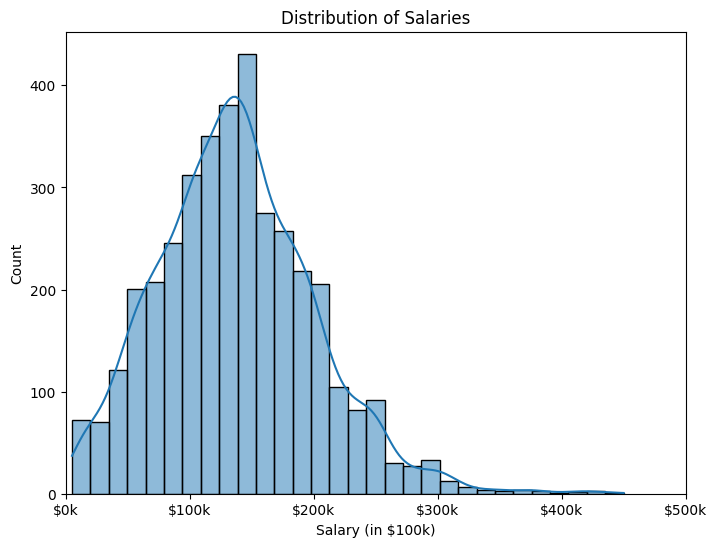

In [8]:
# Distribution of salaries
plt.figure(figsize=(8, 6))
sns.histplot(df['salary_in_usd'], kde=True, bins=30)

# Change the x-ticks to be in $100k increments
ticks_loc = plt.xticks()[0]
plt.xticks(ticks_loc, ['${:.0f}k'.format(x/1000) for x in ticks_loc])
plt.xlim(0, max(ticks_loc))

plt.xlabel('Salary (in $100k)')
plt.title('Distribution of Salaries')
plt.show()


The histogram of salaries is right-skewed, indicating that most data scientists earn below the average salary with only a few earning significantly higher amounts.

Now let's investigate how the salary varies based on the level of experience.

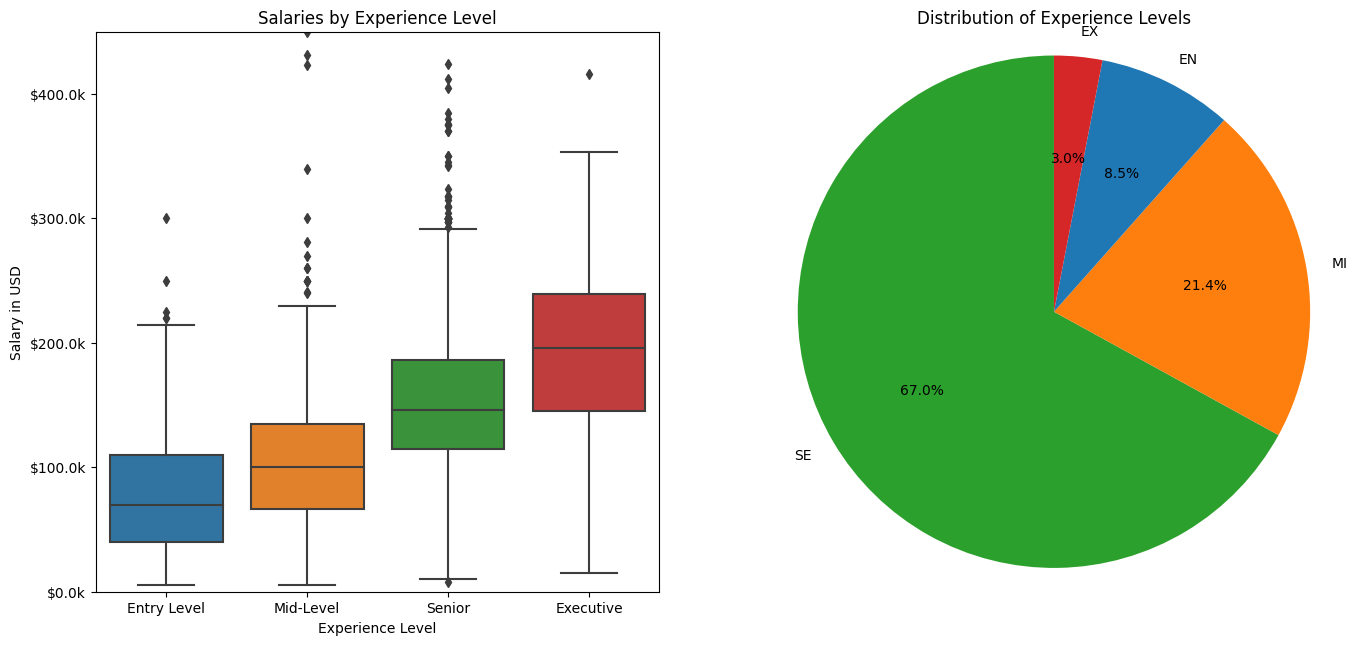

In [9]:
# Create a figure with two subplots: one for the boxplot and one for the pie chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Boxplot in first subplot
order = ['EN', 'MI', 'SE', 'EX']
labels = ['Entry Level', 'Mid-Level', 'Senior', 'Executive']
sns.boxplot(x='experience_level', y='salary_in_usd', data=df, order=order, ax=ax1)
ax1.set_xlabel('Experience Level')
ax1.set_ylabel('Salary in USD')
ax1.set_ylim(0, df['salary_in_usd'].max())
y_ticks = np.arange(0, df['salary_in_usd'].max(), 100000)
ax1.set_yticks(y_ticks)
ax1.set_yticklabels([f'${i/1000}k' for i in y_ticks])
ax1.set_xticks(np.arange(len(order)))
ax1.set_xticklabels(labels)
ax1.set_title('Salaries by Experience Level')

# Pie chart in second subplot
experience_counts = df['experience_level'].value_counts()
labels = experience_counts.index.tolist()  # Get the labels from the actual data

palette = {"EN": "C0", "MI": "C1", "SE": "C2", "EX": "C3"}  # Assign colors based on the boxplot palette

colors = [palette[level] for level in labels]  # Use the same colors as in the boxplot

ax2.pie(experience_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax2.set_title('Distribution of Experience Levels')
ax2.title.set_position([.5, 0.95])  # Adjust title position

plt.subplots_adjust(top=0.85, bottom=0.15)  # Adjust subplot positions

plt.show()


Visually we can suggest the median salary is significantly different between all 4 of the groups. Salary data is often non-parametric between groups so we can use the Kruskal-Wallis test to test for significance.

In [10]:
import scipy.stats as stats

# get data for each group
data_EN = df[df['experience_level'] == 'EN']['salary_in_usd']
data_MI = df[df['experience_level'] == 'MI']['salary_in_usd']
data_SE = df[df['experience_level'] == 'SE']['salary_in_usd']
data_EX = df[df['experience_level'] == 'EX']['salary_in_usd']

# perform Kruskal-Wallis test
H, p = stats.kruskal(data_EN, data_MI, data_SE, data_EX)

print("Kruskal-Wallis test statistic:", H)
print("p-value of Kruskal-Wallis test:", p)


Kruskal-Wallis test statistic: 790.4579980368496
p-value of Kruskal-Wallis test: 5.077553185849974e-171


Generally, if the p-value is less than 0.05, we reject the null hypothesis. In this case, the p-value is extremely small, much less than 0.05, so we can reject the null hypothesis. This means there is strong evidence to support that there's a significant difference in the salary distributions across at least two of the experience levels.

To conduct a post-hoc analysis after a Kruskal-Wallis test, we can perform pairwise Mann-Whitney U tests between all groups. However, this increases the likelihood of Type I error (false positive). To counteract this issue, we'll adjust the p-values using a method known as Bonferroni correction.

In [11]:
from itertools import combinations
from scipy.stats import mannwhitneyu

# Collect all the salary data for each experience level
data = [data_EN, data_MI, data_SE, data_EX]

# Get all combinations of experience levels
combs = list(combinations([0, 1, 2, 3], 2))

# Corrected p-value for multiple testing
corrected_pval = 0.05 / len(combs)

print(f"Corrected p-value for multiple testing: {corrected_pval}\n")

for comb in combs:
    stat, p = mannwhitneyu(data[comb[0]], data[comb[1]], alternative='two-sided')
    print(f"Comparison between group {comb[0]+1} and group {comb[1]+1}")
    print(f"Mann-Whitney U statistic: {stat}, p-value: {p}")

    # Check if the p-value is significant after Bonferroni correction
    if p < corrected_pval:
        print(f"The difference between group {comb[0]+1} and group {comb[1]+1} is statistically significant.\n")
    else:
        print(f"No significant difference between group {comb[0]+1} and group {comb[1]+1}.\n")


Corrected p-value for multiple testing: 0.008333333333333333

Comparison between group 1 and group 2
Mann-Whitney U statistic: 90570.5, p-value: 7.435071750143478e-15
The difference between group 1 and group 2 is statistically significant.

Comparison between group 1 and group 3
Mann-Whitney U statistic: 130103.5, p-value: 8.163074321971893e-87
The difference between group 1 and group 3 is statistically significant.

Comparison between group 1 and group 4
Mann-Whitney U statistic: 3294.5, p-value: 1.2606243953095875e-38
The difference between group 1 and group 4 is statistically significant.

Comparison between group 2 and group 3
Mann-Whitney U statistic: 511950.0, p-value: 2.8664823062609195e-99
The difference between group 2 and group 3 is statistically significant.

Comparison between group 2 and group 4
Mann-Whitney U statistic: 13143.5, p-value: 5.182854228926411e-35
The difference between group 2 and group 4 is statistically significant.

Comparison between group 3 and group 4
M

As expected, average salary increases significantly with experience level and responsibility level. There are some outliers in all categories, possibly due to differences in factors such as location or job title. There are vastly more senior level positions compared to entry, mid and executive level. 

Speaking of location, let's group location by continent and see how the salary distribution varies by the location of the employee and the company.

In [44]:
# Import the necessary library
import pycountry_convert as pc

# Define the function to convert country code to continent code
def country_to_continent(country_code):
    try:
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
    except KeyError:
        return 'Unknown'
    return continent_name

# Apply the function to the 'employee_residence' and 'company_location' columns
df['employee_continent'] = df['employee_residence'].apply(country_to_continent)
df['company_continent'] = df['company_location'].apply(country_to_continent)


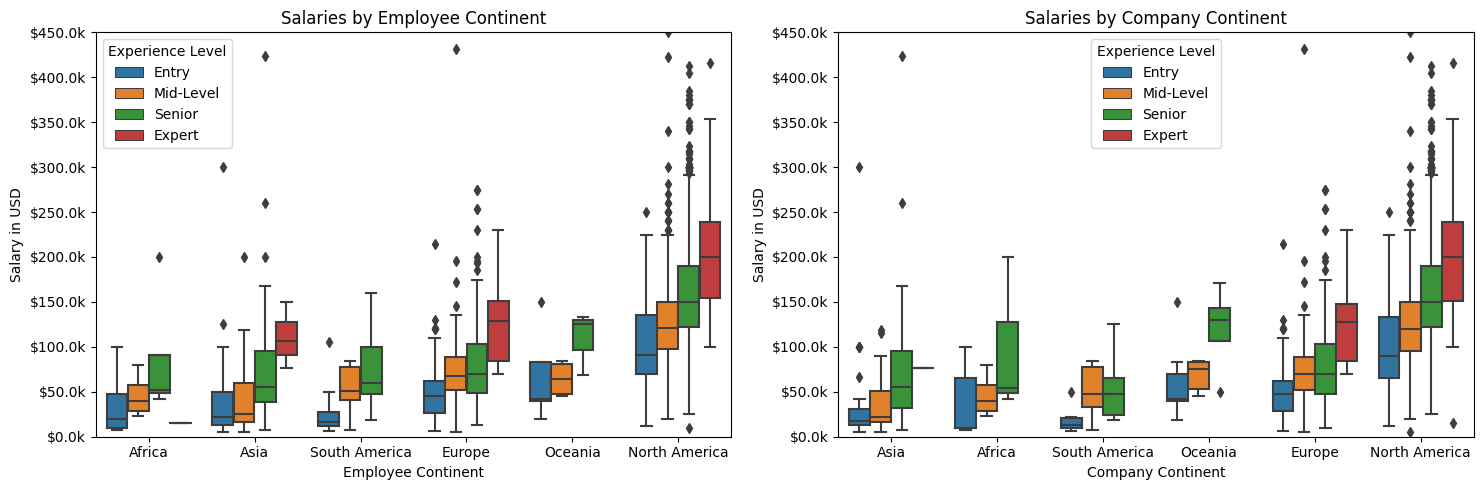

In [13]:
# Define the full names for experience levels
experience_dict = {'EN': 'Entry', 'MI': 'Mid-Level', 'SE': 'Senior', 'EX': 'Expert'}

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Define the order of the continents by median salary
order_employee = df.groupby('employee_continent')['salary_in_usd'].median().sort_values().index
order_company = df.groupby('company_continent')['salary_in_usd'].median().sort_values().index

# Define the order and palette for the experience levels
order_experience = ['EN', 'MI', 'SE', 'EX']
palette = {"EN": "C0", "MI": "C1", "SE": "C2", "EX": "C3"}

# First subplot: Salaries by Employee Continent
sns.boxplot(x='employee_continent', y='salary_in_usd', hue='experience_level', data=df, 
            ax=axs[0], order=order_employee, hue_order=order_experience, palette=palette)
axs[0].set_title('Salaries by Employee Continent')
axs[0].set_xlabel('Employee Continent')
axs[0].set_ylabel('Salary in USD')
axs[0].set_ylim(0, df['salary_in_usd'].max())  # Set y limit to start from 0

# Adjust y axis to be in increments of '$100k'
ticks = axs[0].get_yticks()
axs[0].set_yticks(ticks)
axs[0].set_yticklabels([f'${i/1000}k' for i in ticks])

# Second subplot: Salaries by Company Continent
sns.boxplot(x='company_continent', y='salary_in_usd', hue='experience_level', data=df, 
            ax=axs[1], order=order_company, hue_order=order_experience, palette=palette)
axs[1].set_title('Salaries by Company Continent')
axs[1].set_xlabel('Company Continent')
axs[1].set_ylabel('Salary in USD')
axs[1].set_ylim(0, df['salary_in_usd'].max())  # Set y limit to start from 0

# Adjust y axis to be in increments of '$100k'
ticks = axs[1].get_yticks()
axs[1].set_yticks(ticks)
axs[1].set_yticklabels([f'${i/1000}k' for i in ticks])

# Update legend labels
for ax in axs:
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, [experience_dict[label] for label in labels], title='Experience Level')

plt.tight_layout()
plt.show()


Visually, we see that company location significantly impacts salary, potentially due to variables such as cost of living, taxation, and market saturation. Higher salaries in executive roles in North America, Europe, and Asia may indicate mature data science sectors in these regions. While salary tends to increase with experience universally, entry-level roles in Oceania, Europe, and North America offer higher median salaries, possibly reflecting a general trend of higher employee remuneration in these continents.

Next, we will explore how specific job titles influence salaries.

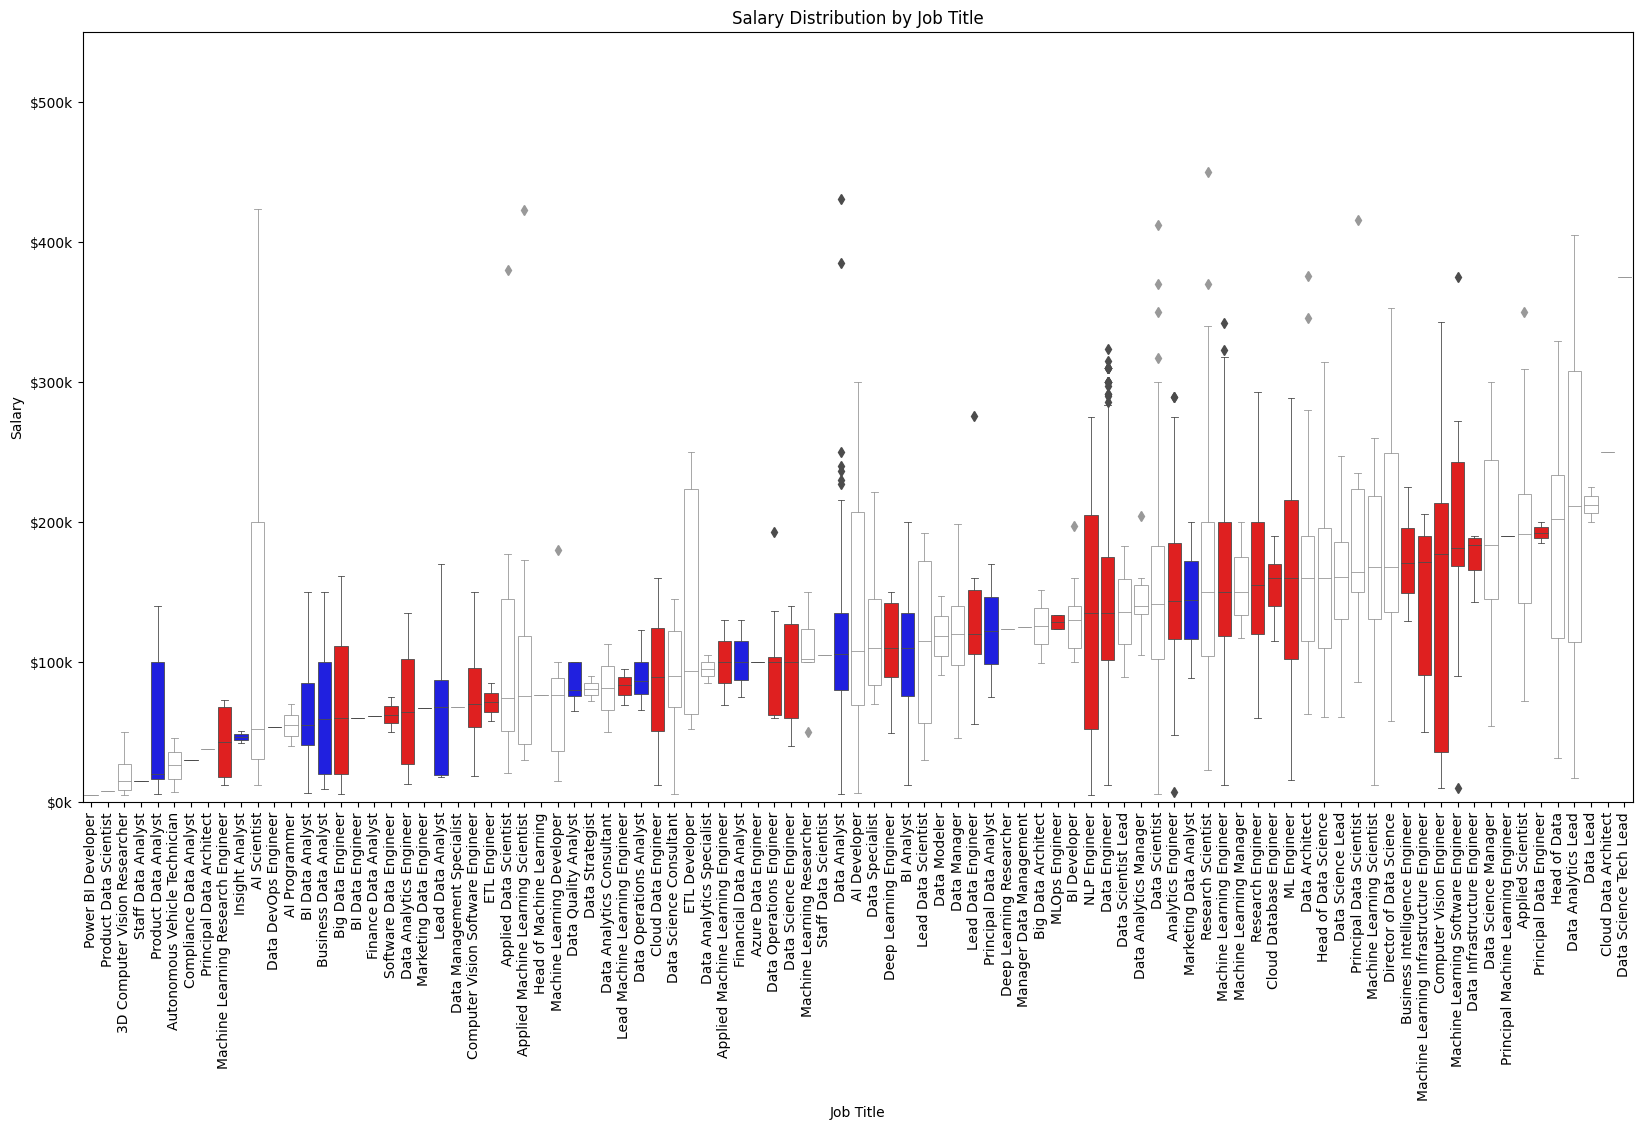

In [14]:
plt.figure(figsize=(20, 10))

# Define job titles of interest
job_titles_interest = ['Engineer', 'Analyst']

# Create a new column 'job_title_category' 
df['job_title_category'] = np.select([df['job_title'].str.contains(job) for job in job_titles_interest], job_titles_interest, default='Others')

# Order the job titles based on median salaries
order = df.groupby('job_title')['salary_in_usd'].median().sort_values().index

# Define colors
colors = {'Engineer': 'red', 'Analyst': 'blue', 'Others': (1, 1, 1, 0.1)} # RGBA for transparent white

# Plot individual boxplots for each category
for category in df['job_title_category'].unique():
    sns.boxplot(x='job_title', y='salary_in_usd', data=df[df['job_title_category'] == category],
                order=order, color=colors[category], linewidth=0.6)

plt.xlabel('Job Title')
plt.ylabel('Salary')
plt.title('Salary Distribution by Job Title')
plt.xticks(rotation=90)

# Change y ticks to represent in $100k
ticks_values = np.arange(0, df['salary_in_usd'].max() + 100000, 100000)
plt.yticks(ticks_values, [f'${i//1000}k' for i in ticks_values])
plt.ylim(0, df['salary_in_usd'].max() + 100000)

plt.show()


In [15]:
import scipy.stats as stats

# get data for each group
engineer_salaries = df[df['job_title'].str.contains('Engineer')]['salary_in_usd']
analyst_salaries = df[df['job_title'].str.contains('Analyst')]['salary_in_usd']

# perform Mann-Whitney U test
U, p = stats.mannwhitneyu(engineer_salaries, analyst_salaries, alternative='greater')

print("Mann-Whitney U test statistic:", U)
print("p-value of Mann-Whitney U test:", p)


Mann-Whitney U test statistic: 779703.5
p-value of Mann-Whitney U test: 3.7936790607900615e-50


Therefore, we suggest that if average salary is the main driving force in your job selection, focus on Engineering roles. This discrepency likely reflects the wider and deeper skillbase necessary in Data Engineering roles.

We can also explore if salaries have been increasing for Data Science roles between 2020 and 2023.

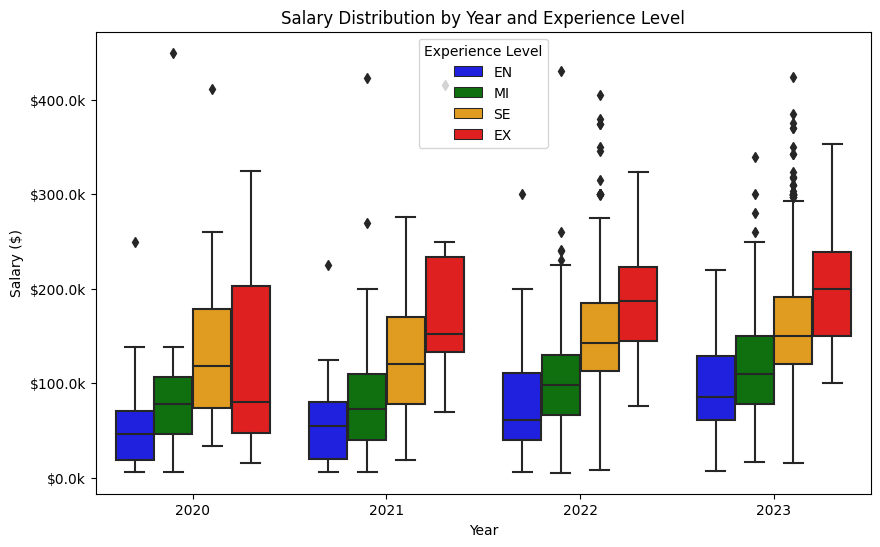

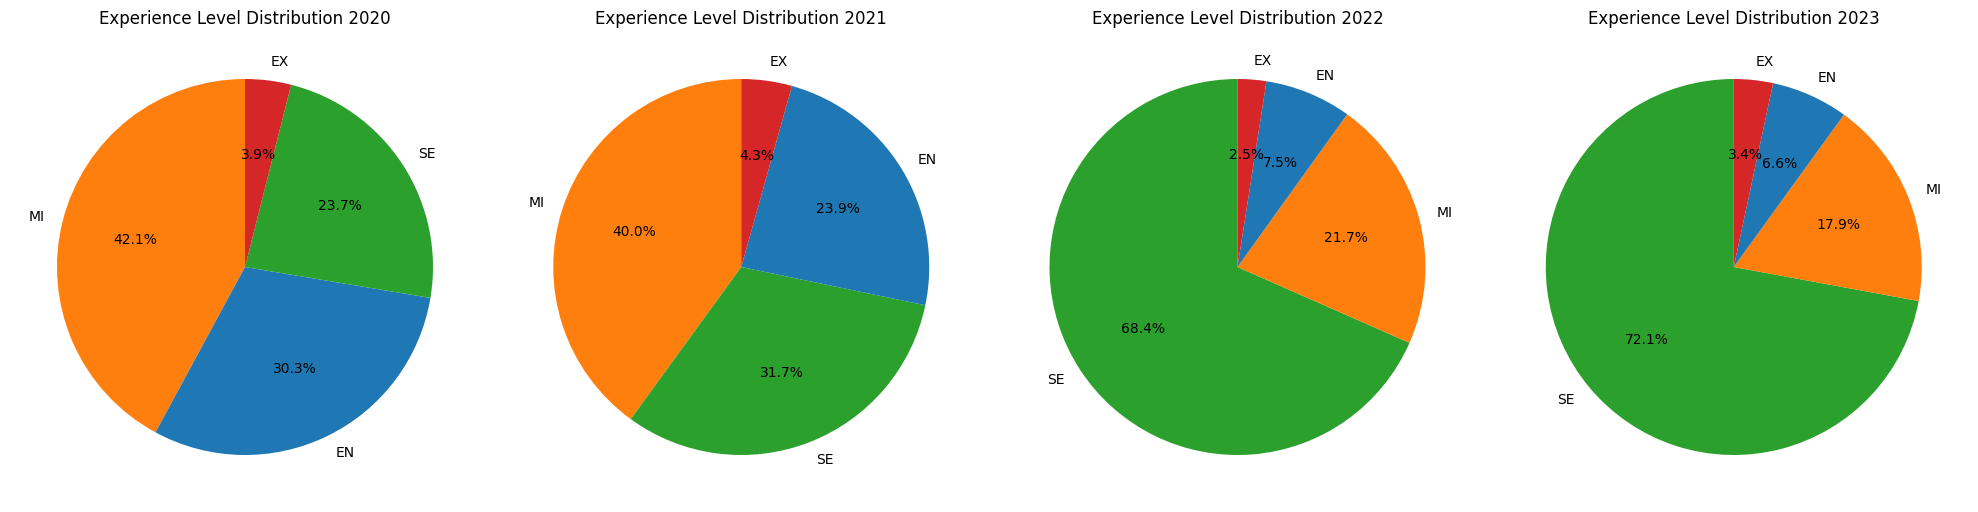

In [16]:
fig, ax = plt.subplots(figsize=(10, 6))

# Boxplot
sns.boxplot(x='work_year', y='salary_in_usd', hue='experience_level', data=df,
            hue_order=['EN', 'MI', 'SE', 'EX'],
            palette=['blue', 'green', 'orange', 'red'],
            ax=ax)

ax.set_ylabel('Salary ($)')
y_ticks = np.arange(0, df['salary_in_usd'].max(), 100000)
ax.set_yticks(y_ticks)
ax.set_yticklabels([f'${i/1000}k' for i in y_ticks])
ax.set_xlabel('Year')
ax.set_title('Salary Distribution by Year and Experience Level')
ax.legend(title='Experience Level')

plt.show()

# Pie Charts
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

years = sorted(df['work_year'].unique())

for i, year in enumerate(years):
    ax = axs[i]
    data = df[df['work_year'] == year]['experience_level'].value_counts()
    ax.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90, 
           colors=[palette[level] for level in data.index])
    ax.set_title(f'Experience Level Distribution {year}')

plt.tight_layout()
plt.show()

Average salary does seem to be increasing over time, especially in the last 2 years. Interestingly the proportions of senior data scientist has significantly increased in the past 4 years in stark contrast to the decreasing proportion of entry level positions. Perhaps the growth of the sector has been slowing down although the actual numbers of entry level positions may be increasing as these are proportions of the total.

Now, before we move onto some Machine Learning, lets plot a correlation matrix with the numeric variables to tell us if there are any strong correlations between different variables which might be important when we start building our machine learning model.

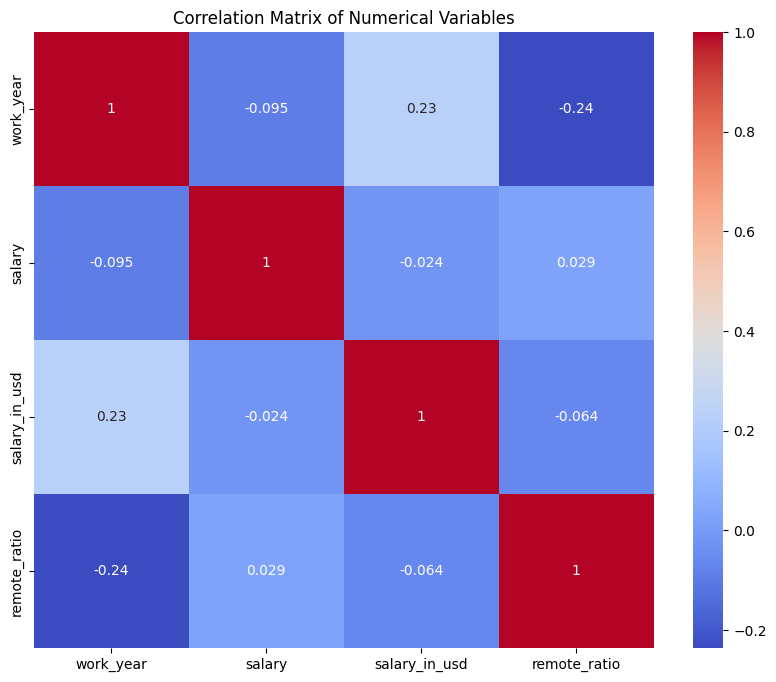

In [17]:
# Create a subset of the dataframe with only numerical columns
numerical_df = df.select_dtypes(include=[np.number])

# Create correlation matrix
corr_matrix = numerical_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

From the correlation matrix, we can see the relationships between our numerical variables. Variables with strong positive or negative correlations can impact our machine learning model. For example, highly correlated variables might lead to multicollinearity in linear regression models. None of the variables show high mutlticollinearity.

Remember that correlation does not imply causation. A correlation indicates a relationship between two variables, but it does not tell us whether one variable's change causes the other to change.

# Machine Learning Process

To predict salaries, we'll follow a typical machine learning pipeline:
1. Preprocessing - Prepare our data for the model
2. Data Splitting - Split our data into a training set and a test set
3. Model Building & Training - Create a model and train it on our data
4. Model Evaluation - Evaluate how well our model is performing

# Feature engineering
We engineer features from our data by using the existing variables to formulate potentially useful predictors of salary in USD. Grouping the diverse job titles into groups may help the model prediction. We already have employee and company location grouped by continent from earlier in the analysis.

In [46]:
# Define the keywords
keywords = ['Engineer', 'Analyst', 'Lead', 'Manager', 'Principle', 'Head', 'Scientist']

# Create a function to apply to the job_title column
def categorize_title(title):
    for keyword in keywords:
        if keyword.lower() in title.lower():
            return keyword
    return 'Other'

# Apply the function to the job_title column to create a new column
df['job_title_category'] = df['job_title'].apply(categorize_title)

# Now let's check the value counts to see how many we have in each category
print(df['job_title_category'].value_counts())

job_title_category
Engineer     1640
Scientist    1054
Analyst       684
Other         220
Manager       113
Lead           24
Head           20
Name: count, dtype: int64


## Data Preprocessing and Splitting
Next, we'll preprocess and split our data into a training set and a test set. We'll use 80% of the data for training and 20% for testing.

In [47]:
# Define categorical and numerical features
cat_cols = ['experience_level', 'employment_type', 'company_size', 'employee_continent', 'company_continent', 'job_title_category']
num_cols = ['work_year', 'remote_ratio']

# Define X and y
X = df[cat_cols + num_cols]
y = df['salary_in_usd']

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Define the preprocessing for numerical and categorical features
num_preprocessor = Pipeline([
    ('num_imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_preprocessor = Pipeline([
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine both preprocessors in a ColumnTransformer
preprocessor = ColumnTransformer([
    ('num_preprocessor', num_preprocessor, num_cols),
    ('cat_preprocessor', cat_preprocessor, cat_cols)
])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit and transform the training data and transform the test data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)


# Model Building, Training and Evaluation
Model selection is a process where you train several models and select the one that performs best. There are many machine learning algorithms available, and the choice of algorithm can depend on the problem type, the nature of your data, and the complexity of the task. In our case, since we are performing a regression task (predicting a continuous output), we can consider algorithms such as Linear Regression, Decision Trees, Random Forests, and Gradient Boosting.

Let's start with a simple Linear Regression model as a baseline. Later, we can use more sophisticated models like Random Forest and Gradient Boosting.

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Define the models
lr = LinearRegression()
rf = RandomForestRegressor(random_state=0)
gb = GradientBoostingRegressor(random_state=0)

# List of models
models = [lr, rf, gb]

for model in models:
    # Train the model
    model.fit(X_train_preprocessed, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test_preprocessed)
    
    # Evaluate the model - we'll use RMSE as the evaluation metric
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f'RMSE for {model.__class__.__name__}: {rmse:.2f}')


RMSE for LinearRegression: 52648.56
RMSE for RandomForestRegressor: 52971.25
RMSE for GradientBoostingRegressor: 52671.10


let's perform model selection using cross-validation. Cross-validation provides a better estimate of the model performance. We will use K-Fold cross-validation here.

In [31]:
from sklearn.model_selection import cross_val_score

# List of models
models = [lr, rf, gb]

for model in models:
    # Perform cross-validation
    scores = cross_val_score(model, X_train_preprocessed, y_train, cv=5, scoring='neg_root_mean_squared_error')
    
    # Take the average of the cross-validation scores
    avg_rmse = -scores.mean()
    
    print(f'Average RMSE for {model.__class__.__name__}: {avg_rmse:.2f}')


Average RMSE for LinearRegression: 48569.63
Average RMSE for RandomForestRegressor: 49523.89
Average RMSE for GradientBoostingRegressor: 48449.68


After this step, we can identify the best model and proceed to hyperparameter tuning. This involves adjusting the parameters of the machine learning algorithm to improve its performance. For example, in the case of Random Forests, we can tune parameters such as n_estimators (the number of trees in the forest) and max_depth (the maximum depth of the trees).

We can perform hyperparameter tuning using methods like Grid Search or Randomized Search.

In [32]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

# Create a GridSearchCV object
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1, verbose=2)

# Perform the grid search
grid_search.fit(X_train_preprocessed, y_train)

# Print the best parameters and the best score
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best score: {-grid_search.best_score_:.2f}')


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 300}
Best score: 48695.88


Great! The Grid Search has provided us with the best hyperparameters for our model. The best parameters are max_depth: 10, min_samples_split: 10, and n_estimators: 300. The score here is root mean squared error (RMSE), a measure of the differences between the values predicted by the model and the actual values. The lower the RMSE, the better the model's performance.

Let's use these optimal parameters to retrain our Random Forest model and evaluate its performance on the test set.

In [33]:
# Initialize the Random Forest regressor with the best parameters
best_rf = RandomForestRegressor(n_estimators=300, max_depth=10, min_samples_split=10, random_state=42)

# Fit the model to the training data
best_rf.fit(X_train_preprocessed, y_train)

# Make predictions on the test data
y_test_pred = best_rf.predict(X_test_preprocessed)

# Evaluate the model
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
print(f'RMSE on test data: {rmse_test:.2f}')


RMSE on test data: 53207.83


color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.


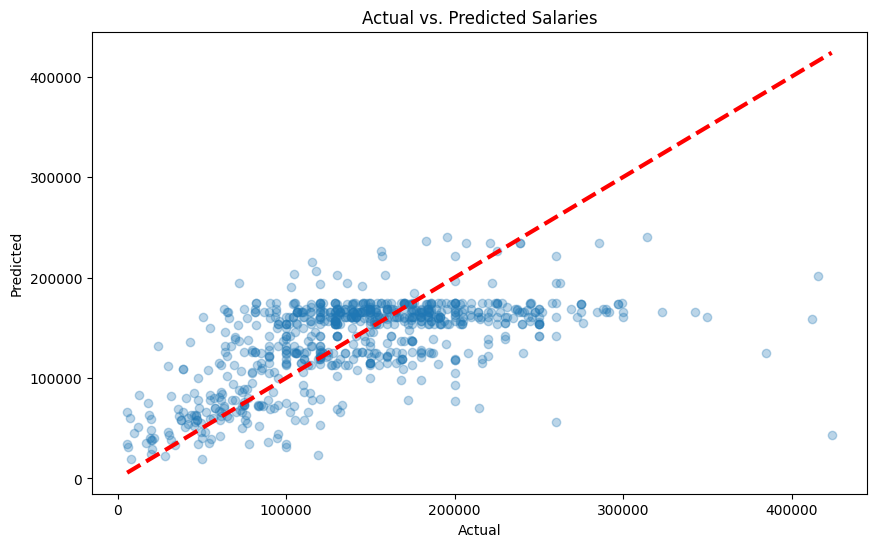

In [40]:
# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Salaries')
plt.show()

The red line would indicate perfect prediction, however our best attempt is not that effective. The massive amount of variance in salaries for the same role is likely the main reason for this.

cat_preprocessor__employee_continent_North America    0.520067
cat_preprocessor__job_title_category_Analyst          0.151626
cat_preprocessor__experience_level_EN                 0.054261
num_preprocessor__work_year                           0.042884
cat_preprocessor__experience_level_MI                 0.033959
num_preprocessor__remote_ratio                        0.031032
cat_preprocessor__experience_level_SE                 0.029648
cat_preprocessor__experience_level_EX                 0.023755
cat_preprocessor__job_title_category_Other            0.013464
cat_preprocessor__job_title_category_Lead             0.011357
dtype: float64


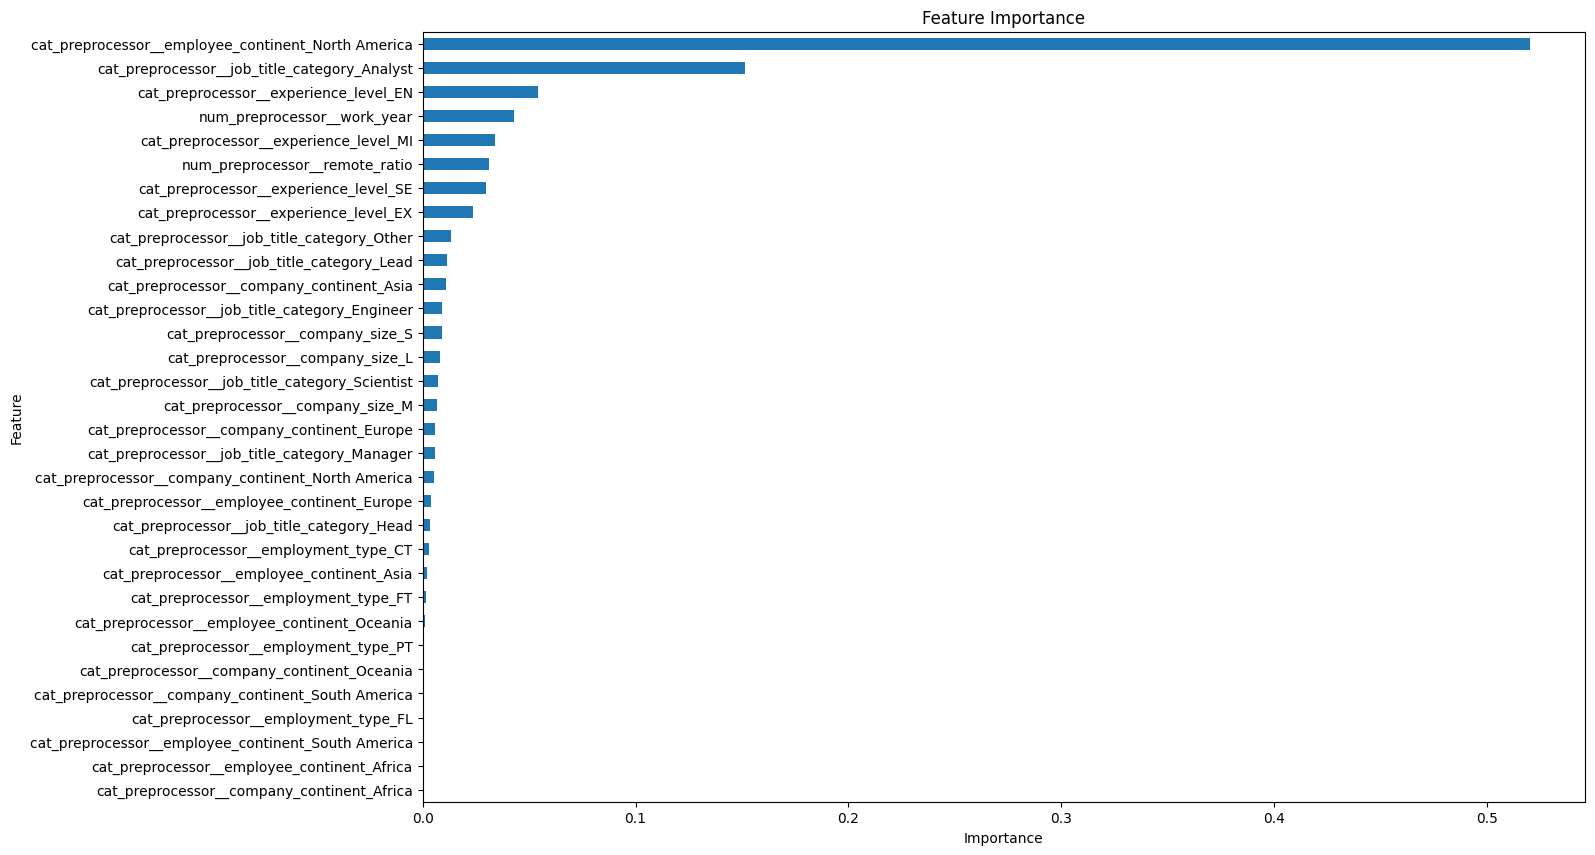

In [34]:
# Get feature importances
importances = best_rf.feature_importances_

# We want to get the original feature names back, which we can do by calling .get_feature_names_out() 
# on the ColumnTransformer
feature_names = preprocessor.get_feature_names_out()

# Create a pandas Series with features and importances
feature_importances = pd.Series(importances, index=feature_names)

# Show 10 most important features
print(feature_importances.sort_values(ascending=False)[:10])

# Plot the feature importances
feature_importances.sort_values().plot(kind='barh', figsize=(15, 10))
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()


Its clear that living in North America, experience level, job title and year of employment are very important in driving your salary in usd (in this data set).

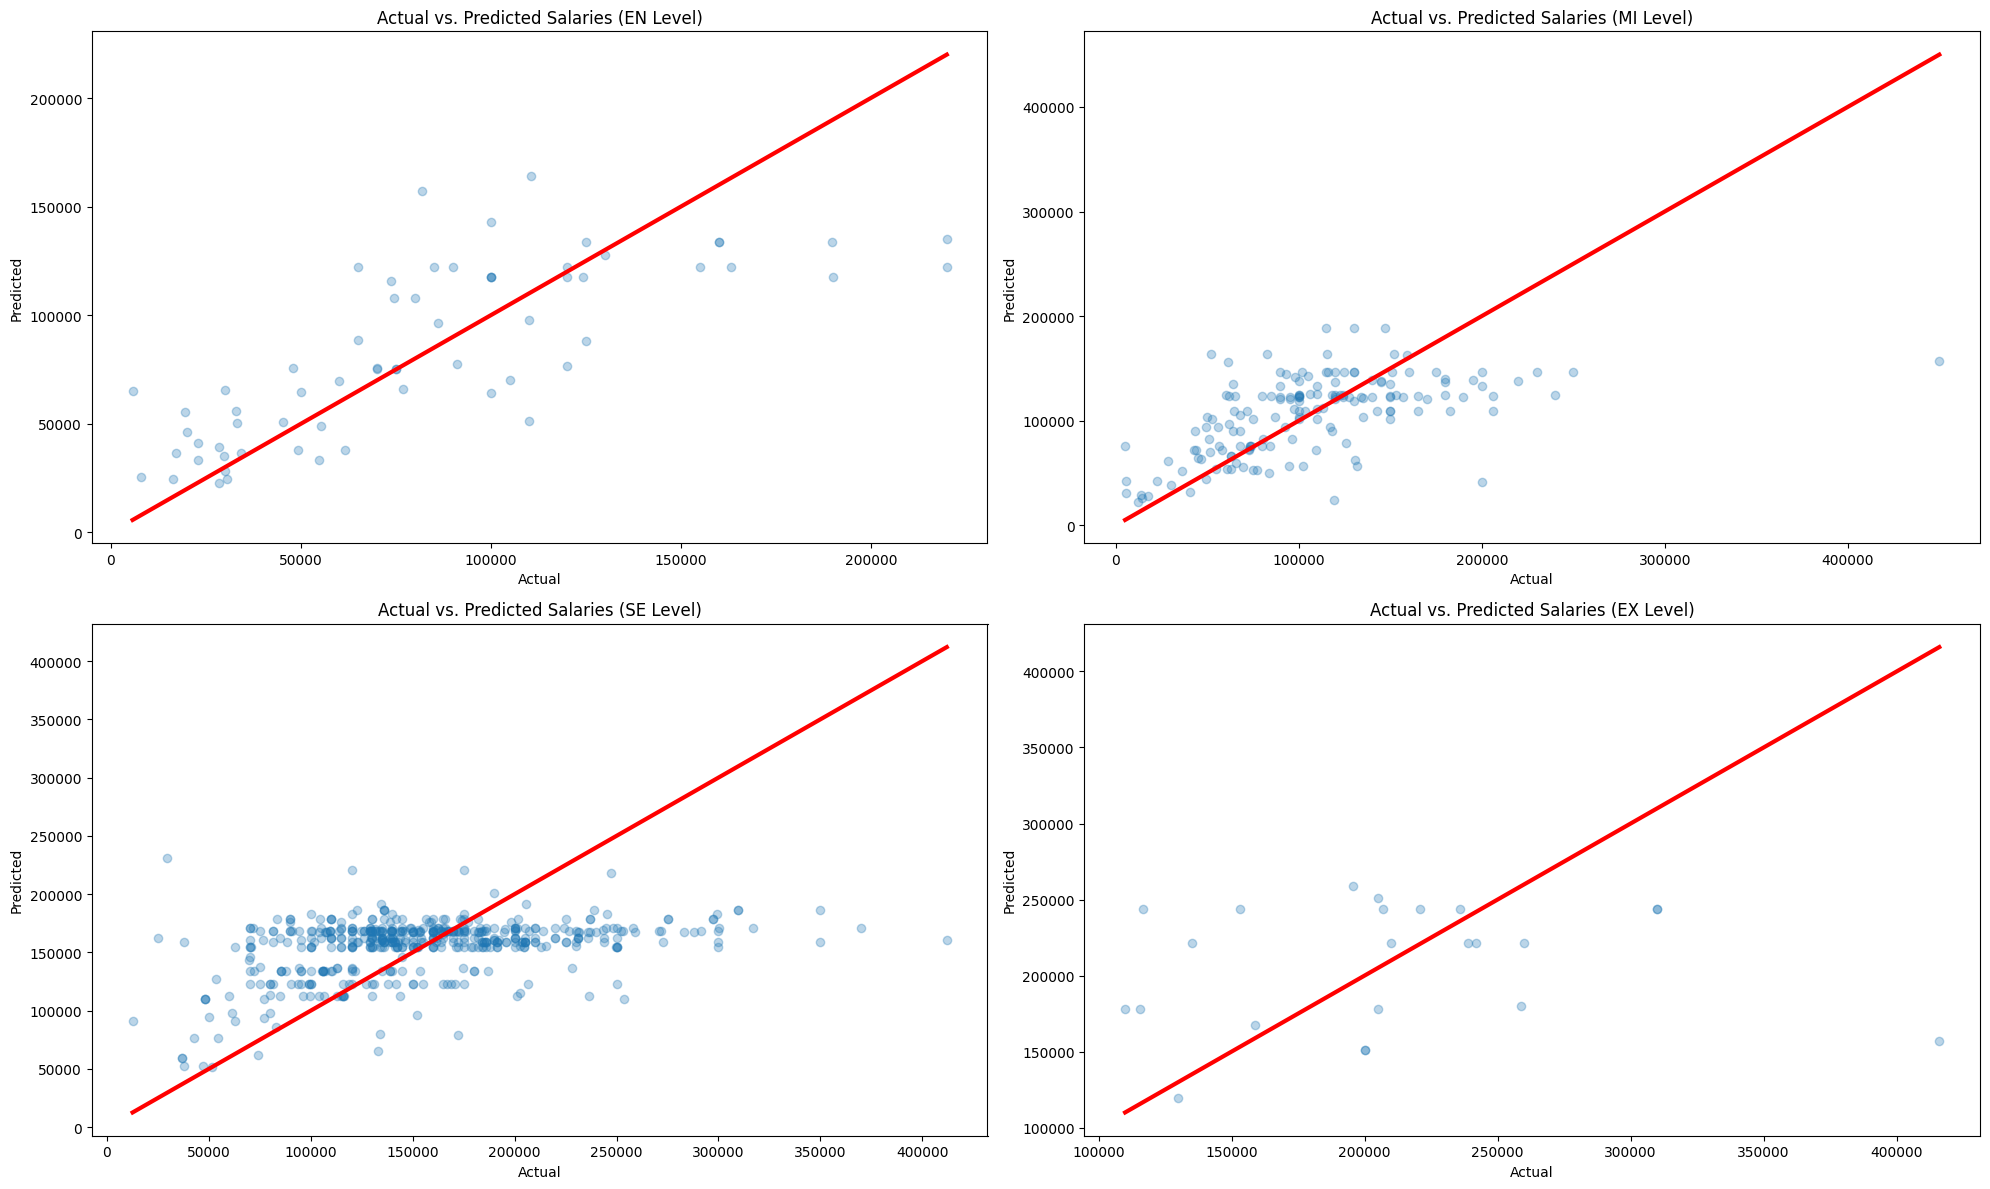

In [54]:
experience_levels = ['EN', 'MI', 'SE', 'EX']

# Initialize a dictionary to hold the models and their predictions
models = {}
predictions = {}

# Initialize the subplot grid
fig, axs = plt.subplots(2, 2, figsize=(20, 12))

# Map levels to subplot grid
subplot_grid = {(0, 0): 'EN', (0, 1): 'MI', (1, 0): 'SE', (1, 1): 'EX'}

# Loop over each subplot
for ax_pos in subplot_grid.keys():
    level = subplot_grid[ax_pos]

    # Filter the data for the current experience level
    df_level = df[df['experience_level'] == level]

    # Define the features and target variable
    X_level = df_level.drop(columns=['salary_in_usd'])
    y_level = df_level['salary_in_usd']

    # Preprocess the data
    X_level_preprocessed = preprocessor.transform(X_level)

    # Split the data into training and testing sets
    X_train_level, X_test_level, y_train_level, y_test_level = train_test_split(X_level_preprocessed, y_level, test_size=0.2, random_state=42)

    # Initialize the model
    model = RandomForestRegressor(n_estimators=300, max_depth=10, min_samples_split=10, random_state=42)

    # Fit the model to the training data
    model.fit(X_train_level, y_train_level)

    # Save the model to the dictionary
    models[level] = model

    # Make predictions on the test data
    y_test_pred_level = model.predict(X_test_level)

    # Save the predictions to the dictionary
    predictions[level] = y_test_pred_level

    # Plot the actual vs predicted values on the appropriate subplot
    axs[ax_pos].scatter(y_test_level, y_test_pred_level, alpha=0.3)
    axs[ax_pos].plot([y_test_level.min(), y_test_level.max()], [y_test_level.min(), y_test_level.max()], lw=3, color='red')
    axs[ax_pos].set_xlabel('Actual')
    axs[ax_pos].set_ylabel('Predicted')
    axs[ax_pos].set_title(f'Actual vs. Predicted Salaries ({level} Level)')

# Display the plot
plt.tight_layout()
plt.show()


By separating out each experience level we can perhaps see that the model struggles the most to predict Senior level salaries which was the largest cohort with a lot of variation in min to max salary. 


# Conclusions
In drawing this analysis to a close, it becomes evident that for those pursuing top-tier compensation in the realm of data science, certain strategic choices could potentially lead to significantly higher remuneration. Firstly, setting one's career trajectory towards North America, home to some of the world's leading tech hubs, appears to be a wise move. Our data strongly suggests that both living and working in this region can significantly bolster a data professional's earning potential.

Secondly, this study underscores the value of specialization within the industry. Specifically, the role of a Data Engineer appears to command a higher average salary than an Analyst role, pointing towards the increasing demand and value associated with this specialization.

Finally, longevity and experience in the industry play a crucial role in remuneration. It is clear that tenured Data Scientists tend to earn considerably higher average salaries. This supports the assertion that continued investment in one's skill set and professional growth within the industry can yield significant financial rewards over time.

In summary, for those aspiring to maximize their earnings in data science, these findings provide a roadmap: target North American companies, consider steering your career towards data engineering, and commit to long-term growth and development within the industry. Such strategic planning, driven by informed analysis, could well pave the way towards not just a rewarding career, but also a highly lucrative one.